####**Read this first**:

This notebook is a **rough notebook**, it contains several tests and experiments and is far from its final form. 

In [ ]:
from google.colab import drive

In [ ]:
!ls "/content/drive/My Drive/Improved_BAGAN"
%cd /content/drive/My\ Drive/Improved_BAGAN

bagan_gp_results  images.npy		Original_Paper		x_train.npy
COVID-19	  improved_bagan_gp.py	tsne_feature_resnet.py	y_train.npy
fetch_data.py	  logs			tsne_plot.py
fid_score.py	  old_thing		wandb
/content/drive/My Drive/Improved_BAGAN


In [ ]:
!pip install -qq wandb

     |████████████████████████████████| 1.8 MB 29.5 MB/s 
     |████████████████████████████████| 144 kB 68.4 MB/s 
     |████████████████████████████████| 181 kB 67.1 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 


In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Bagan Tests

In [ ]:
!python improved_bagan_gp.py

wandb: Currently logged in as: jgim (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.12
wandb: Run data is saved locally in /content/drive/MyDrive/Improved_BAGAN/wandb/run-20220405_184958-3b8gjy8y
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run glorious-elevator-1
wandb: ⭐️ View project at https://wandb.ai/jgim/improved_bagan_mnist_fashion_default
wandb: 🚀 View run at https://wandb.ai/jgim/improved_bagan_mnist_fashion_default/runs/3b8gjy8y
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-05 18:50:03.079912: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Epoch 1/30
58/58 [==============================] - 143s 2s/step - loss: 0.3179 - val_loss: 0.6777
Epoch 2/30
58/58 [=========================

In [ ]:
!python improved_bagan_gp.py

wandb: Currently logged in as: jgim (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.12
wandb: Run data is saved locally in /content/drive/MyDrive/Improved_BAGAN/wandb/run-20220405_212439-drgdw1z1
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run futile-dominion-6
wandb: ⭐️ View project at https://wandb.ai/jgim/improved_bagan_mnist_fashion_default
wandb: 🚀 View run at https://wandb.ai/jgim/improved_bagan_mnist_fashion_default/runs/drgdw1z1
images.shape: (10001, 28, 28)
labels.shape: (10001,)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-05 21:24:43.675007: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Epoch 1/30
30/30 [==============================] - 74s 2s/step - loss: 0.4411 - val_loss: 

# Preprocessing

In [ ]:
!ls

bagan_gp_results  fid_score.py		tsne_feature_resnet.py
COVID-19	  improved_bagan_gp.py	tsne_plot.py
fetch_data.py	  Original_Paper	wandb


In [ ]:
from PIL import Image
from numpy import asarray
img = Image.open("COVID-19/dataset/covid-19/pneumonia_1.jpg")
#img2 = Image.open("COVID-19/dataset/no_findings/pneumonia_39.jpg") 
#img = np.stack((img1, img2))

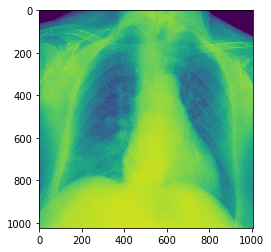

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
data = asarray(img)

In [ ]:
data.shape

(1024, 1007)

In [ ]:
np.max(data)

208

In [ ]:
data = change_image_shape(data)
print(data.shape)

2
(1024, 1007)


In [ ]:
#real[i] = cv2.resize(images[i], (64, 64)).reshape((64, 64, channel))
import cv2
data = cv2.resize(data[0], (64,64)).reshape((64, 64, 1))

In [ ]:
data.shape

(64, 64, 1)

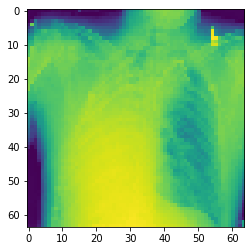

In [ ]:
from matplotlib import pyplot as plt
#plt.imshow(data.reshape(64,64), interpolation='nearest')
plt.imshow(data.reshape(64,64))
plt.show()

In [ ]:
def change_image_shape(images):
    shape_tuple = images.shape
    print(len(shape_tuple))
    if len(shape_tuple) == 3:
        print("condition1")
        images = images.reshape(-1, shape_tuple[-1], shape_tuple[-1], 1)
    elif shape_tuple == 4 and shape_tuple[-1] > 3:
        print("condition2")
        images = images.reshape(-1, shape_tuple[-1], shape_tuple[-1], shape_tuple[1])
    return images


def my_change_image_shape(images):
    #shape_tuple = images.shape
    #print(len(shape_tuple))
    images = images.reshape(64, 64)
    return images

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(images, labels), (_,_) = load_data()

In [ ]:
labels[110]

8

In [ ]:
images[0].shape

(28, 28)

In [ ]:
np.max(images[0])

255

In [ ]:
images.shape[-1]

28

In [ ]:
r = change_image_shape(data)
labels.reshape(-1)

2


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
r.shape

(1024, 1007)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
!pwd

/content/drive/MyDrive/Improved_BAGAN


In [ ]:
!ls

bagan_gp_results  fid_score.py		tsne_feature_resnet.py
COVID-19	  improved_bagan_gp.py	tsne_plot.py
fetch_data.py	  Original_Paper	wandb


In [ ]:
import pathlib
base_dir = pathlib.Path("/content/drive/My Drive/Improved_BAGAN/COVID-19")

In [ ]:
import pathlib
base_dir = pathlib.Path("/content/drive/My Drive/Improved_BAGAN/COVID-19")
train_dataset = image_dataset_from_directory(
    base_dir / "dataset",
    image_size=(64,64),
    color_mode="grayscale",
    batch_size=None,
    label_mode=None
    )

Found 1130 files belonging to 1 classes.


# More data Preprocessing:

In [ ]:
import os, shutil, pathlib

def process_dataset(subset_name, start_index, end_index, 
                    categories, original_dir, new_base_dir):
  for category in categories:
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)  

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(real, labels, test_size=0.3, shuffle=True, random_state=42)
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
base_dir = pathlib.Path("/content/drive/My Drive/Improved_BAGAN/COVID-19/mini")

train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(64,64),
    #color_mode="grayscale",
    batch_size=None,
    label_mode="categorical",
    labels="inferred",
    class_names=["covid_19","no_findings","pneumonia"]
)

Found 40 files belonging to 3 classes.


In [ ]:
validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(64,64),
    #color_mode="grayscale",
    batch_size=None,
    label_mode="categorical",
    labels="inferred",
    class_names=["covid_19","no_findings","pneumonia"]
)

Found 10 files belonging to 3 classes.


In [ ]:
validation_dataset.cardinality().numpy()

10

In [ ]:
for data_batch, labels_batch in validation_dataset:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

Data batch shape: (64, 64, 3)
Labels batch shape: (3,)


In [ ]:
import numpy as np
images = np.zeros((10, 64, 64, 3))
i = 0
for x, y in validation_dataset.take(-1):
  #print(type(x))
  #print(x.shape)
  images[i,:,:,:] = x.numpy()
  #print(y)
  #print(y.shape)
  i = i + 1
  print("---")

---
---
---
---
---
---
---
---
---
---


In [ ]:
type(images), images.shape

(numpy.ndarray, (10, 64, 64, 3))

In [ ]:
!pwd

/content/drive/MyDrive/Improved_BAGAN


In [ ]:
#from tempfile import TemporaryFile
#outfile = TemporaryFile()
np.save("images.npy", images)

In [ ]:
!ls

bagan_gp_results  fid_score.py		logs			tsne_plot.py
COVID-19	  images.npy		Original_Paper		wandb
fetch_data.py	  improved_bagan_gp.py	tsne_feature_resnet.py


In [ ]:
train = np.load('images.npy')
# labels = np.load('y_train.npy')
# images = change_image_shape(images)
train.shape#, train[0]

(10, 64, 64, 3)

In [ ]:
img = change_image_shape(train)
img.shape

4


(10, 64, 64, 3)

In [ ]:
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
base_dir = pathlib.Path("/content/drive/My Drive/Improved_BAGAN/COVID-19")

total_train_set = image_dataset_from_directory(
    base_dir / "dataset",
    image_size=(64,64),
    #color_mode="grayscale",
    batch_size=None,
    label_mode="categorical",
    labels="inferred",
    class_names=["covid_19","no_findings","pneumonia"]
)

Found 1130 files belonging to 3 classes.


In [ ]:
print(total_train_set.cardinality().numpy())
for data_batch, labels_batch in validation_dataset:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

1130
Data batch shape: (64, 64, 3)
Labels batch shape: (3,)


In [ ]:
import numpy as np
x_train = np.zeros((1130, 64, 64, 3))
y_train = np.zeros((1130, 3))
i = 0
for x, y in total_train_set.take(-1):
  x_train[i,:,:,:] = x.numpy()
  y_train[i,:] = y.numpy()
  i = i + 1
print(i)

In [ ]:
x_train.shape, y_train.shape

((1130, 64, 64, 3), (1130, 3))

In [ ]:
features = np.array([list(x[0].numpy()) for x in list(total_train_set)])
labels = np.array([x[1].numpy() for x in list(total_train_set)])


In [ ]:
features.shape, labels.shape

((1130, 64, 64, 3), (1130, 3))

# Final Data Preprocessing

In [6]:
# Data Preprocessing
import pathlib
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
base_dir = pathlib.Path("/content/drive/My Drive/Improved_BAGAN/COVID-19")

# Total set
# Split in train and validation set is done by the original GAN model
total_set = image_dataset_from_directory(
    base_dir / "dataset",
    image_size=(64,64),
    color_mode="grayscale",
    batch_size=None,
    label_mode="int",
    labels="inferred",
    class_names=["covid_19","no_findings","pneumonia"]
)

# Divide in features and labels
x_train = np.array([list(x[0].numpy()) for x in list(total_set)])
y_train = np.array([x[1].numpy() for x in list(total_set)])

print(y_train.shape)
assert( x_train.shape == (1130, 64, 64, 1))
assert( y_train.shape == (1130, ))

from sklearn.model_selection import train_test_split
SEED = 42
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  random_state=SEED,
                                                  test_size=0.2,
                                                  stratify=y_train)

# Store as npy files
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)

Found 1130 files belonging to 3 classes.
(1130,)


In [9]:
!python improved_bagan_gp.py

wandb: Currently logged in as: jgim (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.14
wandb: Run data is saved locally in /content/drive/MyDrive/Improved_BAGAN/wandb/run-20220410_145951-2lrie54v
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run proud-wave-3
wandb: ⭐️ View project at https://wandb.ai/jgim/xray_improved_bagan_v2.0
wandb: 🚀 View run at https://wandb.ai/jgim/xray_improved_bagan_v2.0/runs/2lrie54v
images.shape: (10001, 28, 28)
labels.shape: (10001,)
xray dataset
Get number of classes: 3
x_train.shape: (723, 64, 64, 1)
y_train.shape: (723,)
x_test.shape: (181, 64, 64, 1)
y_test.shape: (181,)
Get number of classes: 3
checking labels:
0
()
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-10 14:59:56.518642: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] O